In [1]:
import pandas as pd
%matplotlib inline
import geopandas as gp

In [88]:
ntc = pd.read_csv("Non-Traffic-Citations.csv",
                  index_col="NEIGHBORHOOD") # read in dataset
ntc.head(5)

,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
NEIGHBORHOOD,,,,,,,,,,,,,,
North Oakland,1078081,16157849,M,B,29.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,4,507,8.0,3.0,-79.951692,40.449311
North Oakland,1078082,16157849,M,W,21.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,4,507,8.0,3.0,-79.951692,40.449311
Allegheny Center,1078083,16159579,NaN,NaN,NaN,2016-08-25T11:10:00,"NORTH PARK PITTSBURGH, PA",5505 Public Drunkenness,1,2204,NaN,NaN,0.000000,0.000000
Homewood South,1078084,16159780,M,B,22.0,2016-08-25T16:42:00,"7200 Block FRANKSTOWN AV PITTSBURGH, PA","6501(a)(1) Scattering Rubbish; Any waste, dang...",5,1303,9.0,2.0,-79.896254,40.457329
Upper Lawrenceville,1078085,16161591,F,W,22.0,2016-08-28T00:58:00,"6100 Block BERLIN WY PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,2,1011,7.0,2.0,-79.946664,40.485403


In [83]:
ntc_nbhd = ntc.groupby("NEIGHBORHOOD")[["OFFENSES"]]
ntc_nbhd = ntc_nbhd.count() # counting total number of offenses for each neighborhood
ntc_nbhd = ntc_nbhd.sort_values(by=["OFFENSES"], ascending=True).drop('Unable To Retrieve Address') # sorting and dropping unhelpful data
ntc_nbhd.head(10)

,OFFENSES
NEIGHBORHOOD,
Mt. Oliver Boro,1
Ridgemont,1
Chartiers City,1
Outside State,2
St. Clair,3
Mt. Oliver Neighborhood,4
Swisshelm Park,4
New Homestead,5
Hays,5


<AxesSubplot:title={'center':'Number of Non-Traffic Citations in Pittsburgh Neighborhoods'}, xlabel='Number of Non-Traffic Citations', ylabel='Neighborhood'>

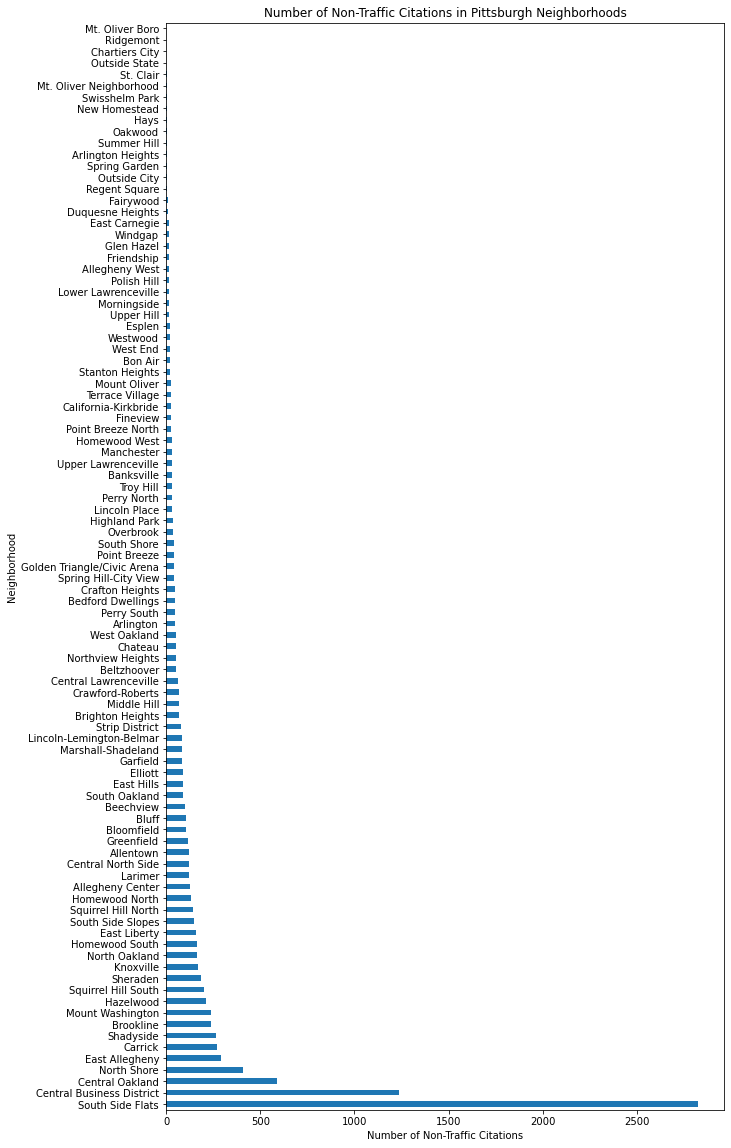

In [84]:
graph = ntc_nbhd.sort_values(by=["OFFENSES"], ascending=False)
graph = graph.plot.barh(y="OFFENSES",figsize=(10,20), legend=None) # plotting bar graph
graph.set_xlabel("Number of Non-Traffic Citations") # making labels for the graph
graph.set_ylabel("Neighborhood")
graph.set_title("Number of Non-Traffic Citations in Pittsburgh Neighborhoods")
graph # displays graph

Text(0.5, 1.0, 'Number of Non-Traffic Citations in Pittsburgh Neighborhoods')

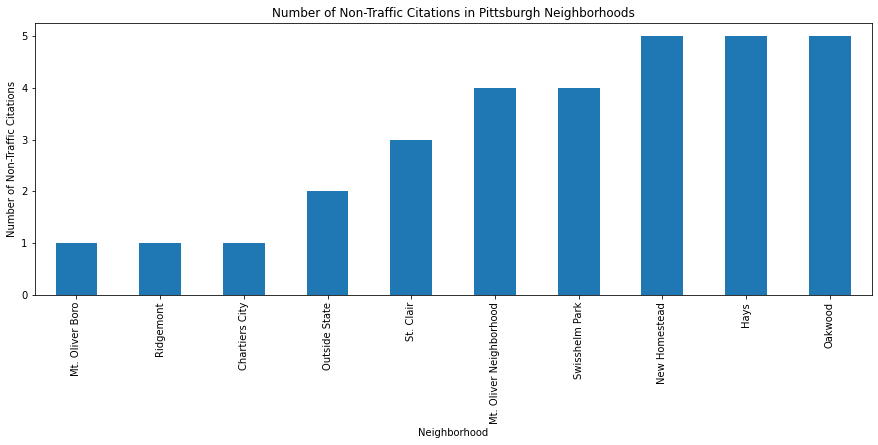

In [53]:
# graph of just the top 10 neighborhoods with least number of non-traffic citations
topten = ntc_nbhd[:10].plot(kind="bar", figsize=(15,5),legend=None)
topten.set_ylabel("Number of Non-Traffic Citations")
topten.set_xlabel("Neighborhood")
topten.set_title("Number of Non-Traffic Citations in Pittsburgh Neighborhoods")

<AxesSubplot:>

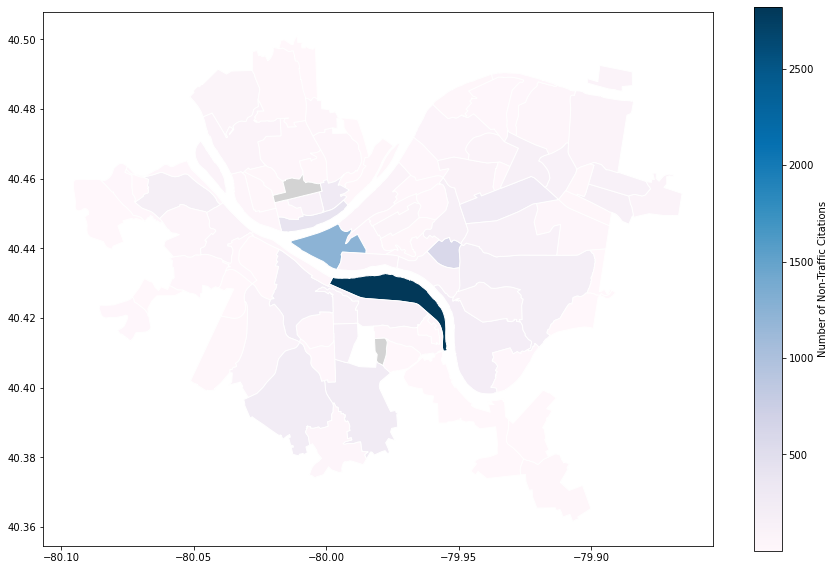

In [90]:
neighborhoods = gp.read_file("Neighborhoods/Neighborhoods_.shp") # read in shapefile
ntc_map = neighborhoods.merge(ntc_nbhd, how='left', left_on='hood', right_on='NEIGHBORHOOD') # merge
ntc_map.plot(column='OFFENSES', # data to be used for coloring
               cmap='PuBu',              # color palette
               edgecolor="white",        
               legend=True,              
               legend_kwds={'label': "Number of Non-Traffic Citations"}, 
               figsize=(15, 10),        
               missing_kwds={"color": "lightgrey"} # neighborhoods with no data are grey
               )

In [43]:
scores = dict()
score = 0

for index,row in ntc_nbhd.iterrows():
        scores[index] = score 
        score = score + 1
scores 

{'Mt. Oliver Boro': 0,
 'Ridgemont': 1,
 'Chartiers City': 2,
 'Outside State': 3,
 'St. Clair': 4,
 'Mt. Oliver Neighborhood': 5,
 'Swisshelm Park': 6,
 'New Homestead': 7,
 'Hays': 8,
 'Oakwood': 9,
 'Summer Hill': 10,
 'Arlington Heights': 11,
 'Outside City': 12,
 'Regent Square': 13,
 'Spring Garden': 14,
 'Fairywood': 15,
 'Duquesne Heights': 16,
 'East Carnegie': 17,
 'Windgap': 18,
 'Glen Hazel': 19,
 'Friendship': 20,
 'Allegheny West': 21,
 'Polish Hill': 22,
 'Morningside': 23,
 'Lower Lawrenceville': 24,
 'Upper Hill': 25,
 'Westwood': 26,
 'Esplen': 27,
 'West End': 28,
 'Bon Air': 29,
 'Stanton Heights': 30,
 'Mount Oliver': 31,
 'Terrace Village': 32,
 'California-Kirkbride': 33,
 'Fineview': 34,
 'Point Breeze North': 35,
 'Upper Lawrenceville': 36,
 'Manchester': 37,
 'Homewood West': 38,
 'Banksville': 39,
 'Troy Hill': 40,
 'Perry North': 41,
 'Lincoln Place': 42,
 'Highland Park': 43,
 'Overbrook': 44,
 'South Shore': 45,
 'Point Breeze': 46,
 'Golden Triangle/Civic